In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [12]:
df =pd.read_csv(
    "applicant.csv")
df.columns = [
        "Age","Workclass","fnlwgt","Education","Education-Num","Marital Status",
        "Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss",
        "Hours per week","Country","Target"]
df

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
df = df.replace(' ?', np.nan)
x = df.isnull().sum().sum() #check if dataset contains any Na
x

4262

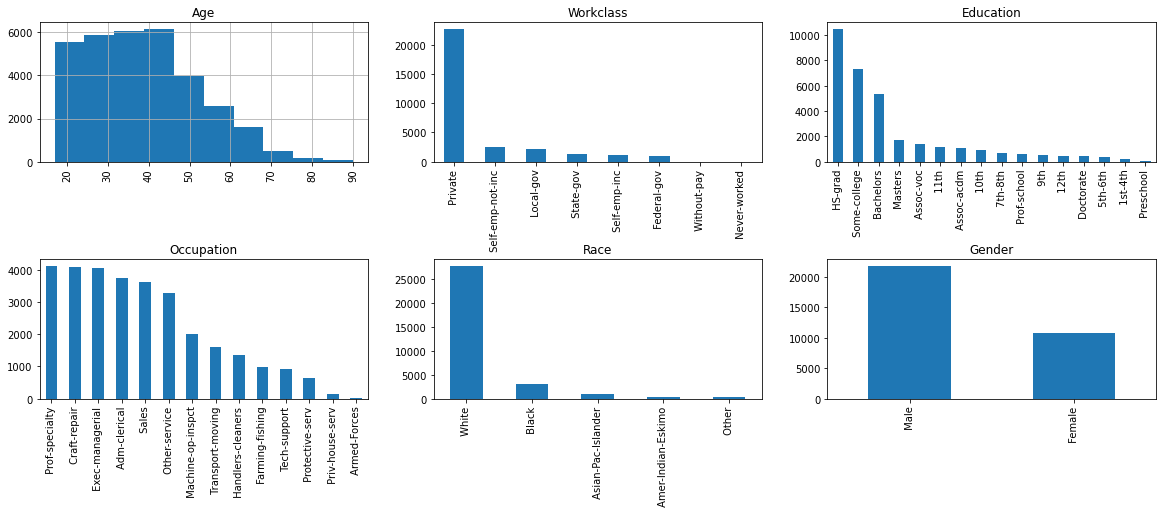

In [14]:
fig = plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(df.shape[1])/cols)

for i,column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if df.dtypes[column] ==np.object: 
        df[column].value_counts().plot(kind="bar",axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [15]:
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()
df['Occupation']=le.fit_transform(df['Occupation'].astype(str))
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,3,Wife,White,Female,0,0,40,United-States,<=50K


In [16]:
df['Target']=le.fit_transform(df['Target'].astype(str))
df.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


int64


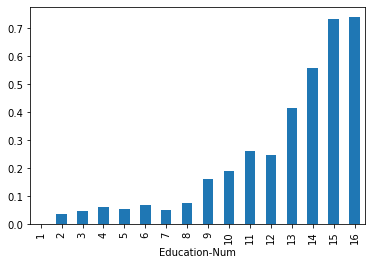

In [17]:
print(df['Education-Num'].dtype)
df.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X=df[['Education-Num','Occupation']]
Y=df['Target']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [19]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7886977886977887


In [21]:
classifier =SVC(kernel='poly', C=10.0,cache_size=1000)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7612100737100738


In [20]:
classifier =SVC(kernel='linear', C=10.0)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7612100737100738


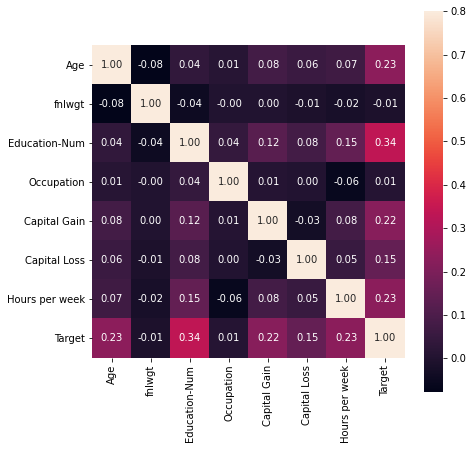

In [10]:
import seaborn as sns
corrmat=df.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8, square=True, annot=True,fmt='.2f');
plt.show()

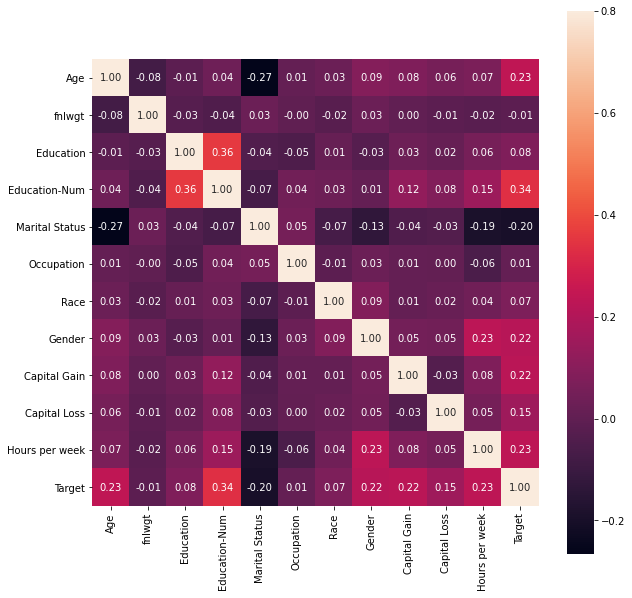

In [11]:
df['Race']=le.fit_transform(df['Race'].astype(str))
df['Gender']=le.fit_transform(df['Gender'].astype(str))
df['Marital Status']=le.fit_transform(df['Marital Status'].astype(str))
df['Education']=le.fit_transform(df['Education'].astype(str))
corrmat=df.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,vmax=.8, square=True, annot=True, fmt='.2f');
plt.show()

In [12]:
X=df[['Education-Num','Occupation','Age','Gender']]
Y=df['Target']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
classifier=SVC()
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

0.8000614250614251


In [13]:
classifier =SVC(kernel='rbf', C=1.0)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

0.8000614250614251


In [14]:
classifier =SVC(kernel='linear', C=10.0)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)
#GOT --> 0.804514742014742

0.804514742014742
